<a href="https://colab.research.google.com/github/arafMustavi/python/blob/master/pyTessaract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pyTesseract 
Installation of pyTessaract
Tesseract is not inbuilt/pre-installed in Colab Environment. To enable it,we have to run the following command that will download and install the *OCR and pyTesseract* in our environment.


I followed this [medium](https://medium.com/@bhadreshpsavani/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0) Article:

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Tesseract Import

In [2]:
from PIL import Image

import pytesseract

dir(pytesseract)

['Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_tesseract_version',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [3]:
help(pytesseract.image_to_string)

help(Image.Image.resize)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string

Help on function resize in module PIL.Image:

resize(self, size, resample=3, box=None, reducing_gap=None)
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:attr:`PIL.Image.NEAREST`, :py:attr:`PIL.Image.BOX`,
       :py:attr:`PIL.Image.BILINEAR`, :py:attr:`PIL.Image.HAMMING`,
       :py:attr:`PIL.Image.BICUBIC` or :py:attr:`PIL.Image.LANCZOS`.
       Default filter is :py:attr:`PIL.Image.BICUBIC`.
       If the image has mode "1" or "P", it is
       always set to :py:attr:`PIL.Image.NEAREST`.
       See: :ref:`concept-filters`.
    :param box: An optional 4-tuple of floats providing
       the 

In [4]:
import inspect

src = inspect.getsource(pytesseract.image_to_string)

print(src)

# This Returns how the function looks like under the hood

def image_to_string(
    image, lang=None, config='', nice=0, output_type=Output.STRING, timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to string
    """
    args = [image, 'txt', lang, config, nice, timeout]

    return {
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DICT: lambda: {'text': run_and_get_output(*args)},
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()



We can inspect this as well using just ?? at the end of any method

format : **package.method??**

example : 
```
# pytesseract.image_to_string??
```



In [5]:
pytesseract.image_to_string??

**Tesseract in Action**

Importing of the image to work with OCR
Running using the OCR

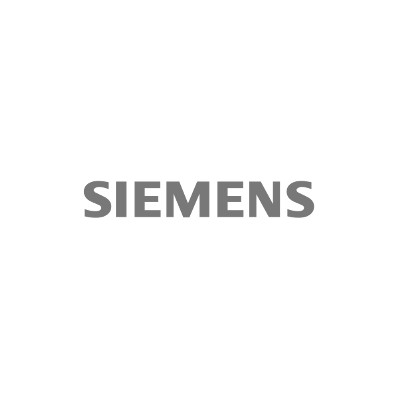

----------------------------
SIEMENS


In [6]:
img = Image.open("siemens.jpg")
display(img)

print("----------------------------")

text = pytesseract.image_to_string(img)
print(text)

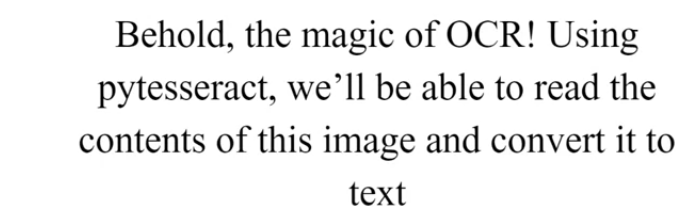

----------------------------
SIEMENS


In [7]:
img2 = Image.open("Tessaract.png")
display(img2)

print("----------------------------")

text2 = pytesseract.image_to_string(img2)
print(text)

# Tesseract Further with Noisy Images.


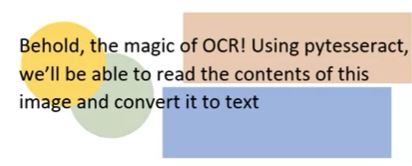

----------------------------
e magic of OCR! Using pytesseract,
le to read the contents of this
d convert it to text


In [9]:
img2 = Image.open("Noisy Text.png")
display(img2)

print("----------------------------")

text2 = pytesseract.image_to_string(img2)
print(text2)

Decision : Tesseract Miserably Failed to identify the characters.

# Image Resize 

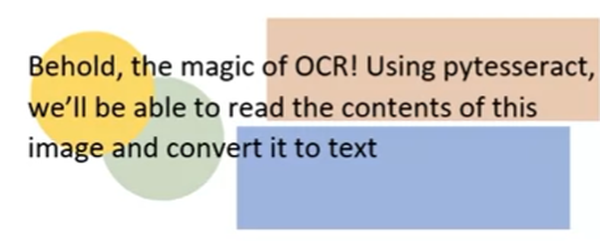

e magic of OCR! Using pytesseract,
le to read the contents of this
d convert it to text


In [11]:
import PIL
basewidth = 600
img = Image.open("Noisy Text.png")
wpercent = (basewidth/float(img.size[0]))
hsize = int(float(img.size[1])*float(wpercent))
img1 = img.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
img1.save("resized_noise.png")
display(img1)

text3 = pytesseract.image_to_string(img2)
print(text3)

Decision : Tesseract Miserably Failed to identify the characters even after resize

# Grayscale Conversion Test

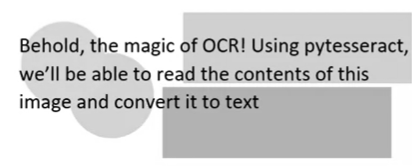

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text


In [12]:
imgGrayScale = Image.open("Noisy Text.png")
imgGrayScale = imgGrayScale.convert('L')
imgGrayScale.save("Grey_noise.png")
display(imgGrayScale)

textGrey = pytesseract.image_to_string(imgGrayScale)
print(textGrey)

Decision: The Grey Color Conversion actually worked!

# Image Binarization

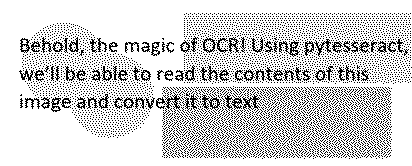

In [13]:
imgBinary = Image.open("Noisy Text.png").convert('1')
imgBinary.save("Binary_noise.png")
display(imgBinary)

#textGrey = pytesseract.image_to_string(imgGrayScale)
#print(textGrey)


In [14]:
def binarize(image_to_transform , threshold):
  output_image = image_to_transform.convert("L")

  for x in range(output_image.width):
    for y in range(output_image.height):
      if output_image.getpixel((x,y)) < threshold :
        output_image.putpixel( (x,y) , 0)
      else:
        output_image.putpixel( (x,y) , 255)
  return output_image

Current0


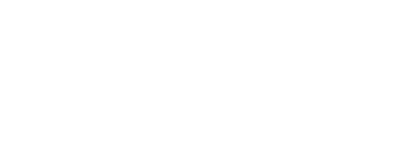


Current64


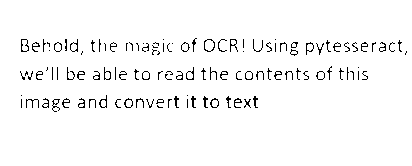

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text
Current128


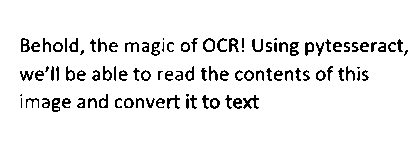

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text
Current192


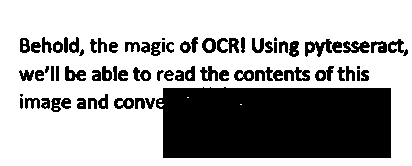

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this

=~ “ii
Current256


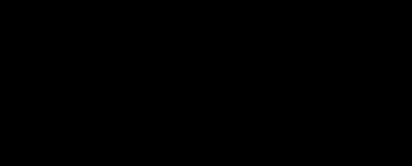

In [15]:
for thres in range(0,257,64):
  print("Current" + str(thres))
  imgBin = binarize(Image.open("Noisy Text.png"),thres)
  display(imgBin)
  textBin = pytesseract.image_to_string(imgBin)
  print(textBin)

